In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# The following line is needed for some versions of Python and Jupyter Notebooks to display the plots in the notebook.
%matplotlib inline



In [3]:
abnb = pd.read_csv("listings.csv")
abnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,100,30,48,2019-11-04,0.35,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,73,1,386,2021-01-27,4.99,1,249
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.35,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,79,2,474,2020-09-25,3.31,1,343
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.85,1,0


In [4]:
#summary of missing Data
abnb.describe(include = "all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,3.701200e+04,36999,3.701200e+04,36994,37012,37012,37012.000000,37012.000000,37012,37012.000000,37012.000000,37012.000000,27489,27489.000000,37012.000000,37012.000000
unique,NaN,35912,NaN,9091,5,220,NaN,NaN,4,NaN,NaN,NaN,2226,NaN,NaN,NaN
top,NaN,Well-kept apartment home | 1BR in New York,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN
freq,NaN,37,NaN,312,16553,2733,NaN,NaN,19397,NaN,NaN,NaN,449,NaN,NaN,NaN
mean,2.510589e+07,NaN,9.370949e+07,NaN,NaN,NaN,40.729653,-73.950989,NaN,142.842240,23.323679,22.904112,NaN,0.867197,9.405220,130.282800
std,1.517880e+07,NaN,1.101374e+08,NaN,NaN,NaN,0.054710,0.048291,NaN,275.740987,26.441255,47.864720,NaN,1.320503,31.613257,146.635272
min,2.595000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.508680,-74.239860,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,1.103335e+07,NaN,9.643914e+06,NaN,NaN,NaN,40.690320,-73.983812,NaN,60.000000,4.000000,0.000000,NaN,0.110000,1.000000,0.000000
50%,2.485448e+07,NaN,4.023649e+07,NaN,NaN,NaN,40.725465,-73.955790,NaN,99.000000,30.000000,4.000000,NaN,0.360000,1.000000,66.000000
75%,3.982193e+07,NaN,1.529683e+08,NaN,NaN,NaN,40.762480,-73.933720,NaN,151.000000,30.000000,20.000000,NaN,1.120000,2.000000,292.000000


In [5]:
#Removing all the rows with missing datas
missing_rows = abnb.isna().any(axis=1)
abnb2 = abnb[~missing_rows]
abnb2.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.747100e+04,2.747100e+04,27471.000000,27471.000000,27471.000000,27471.000000,27471.000000,27471.000000,27471.000000,27471.000000
mean,2.245890e+07,8.314324e+07,40.728589,-73.949769,133.821484,21.486222,30.852244,0.867663,5.704525,127.785483
std,1.419081e+07,1.010201e+08,0.055758,0.049280,239.526761,24.116436,53.305920,1.320804,20.297219,145.041276
min,2.595000e+03,2.438000e+03,40.508680,-74.239860,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,9.714437e+06,8.132832e+06,40.688515,-73.983020,60.000000,3.000000,3.000000,0.110000,1.000000,0.000000
50%,2.169366e+07,3.472087e+07,40.723250,-73.954750,98.000000,30.000000,9.000000,0.360000,1.000000,66.000000
75%,3.512812e+07,1.319304e+08,40.762720,-73.932580,150.000000,30.000000,33.000000,1.130000,2.000000,280.000000
max,4.797869e+07,3.861397e+08,40.911270,-73.710870,10000.000000,1250.000000,753.000000,40.310000,255.000000,365.000000


<AxesSubplot:>

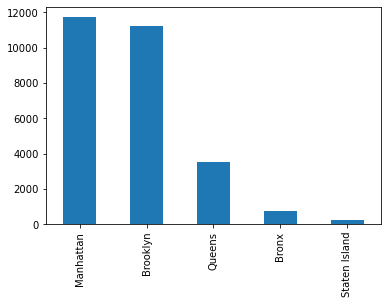

In [57]:
abnb2['neighbourhood_group'].value_counts().plot(kind='bar')

# From the above bar chart we can conclude that most of listings are in Manhattan, followed by Brooklyn

<AxesSubplot:>

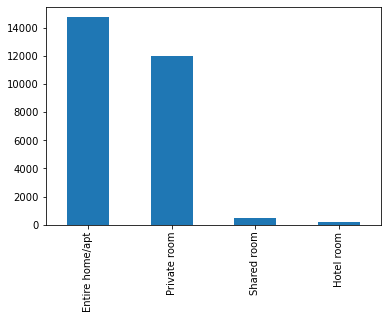

In [58]:
abnb2['room_type'].value_counts().plot(kind='bar')

# From the above bar chart we can conclude that Entire home/apt is most avalilable option on Airbnb

Text(0.5, 1.0, 'Room Type Vs Cost')

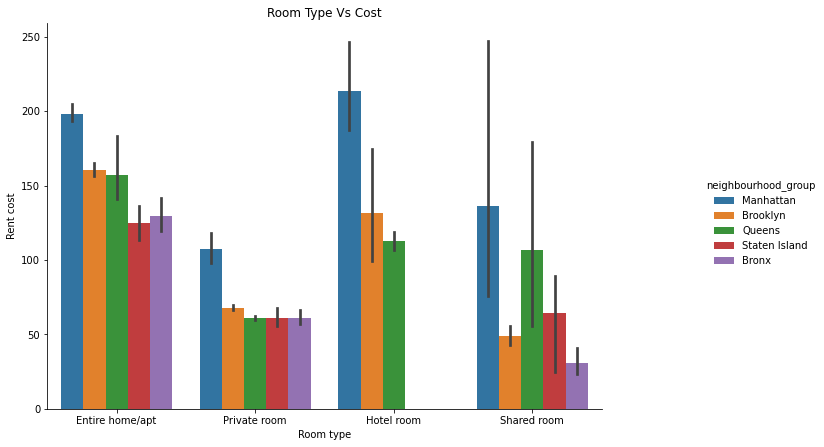

In [6]:
g = sns.catplot(x = "room_type", y = "price",hue = "neighbourhood_group", kind = "bar", data = abnb2)
g.fig.set_size_inches(12,6)
#plt.xticks(rotation=45)
plt.xlabel("Room type")
plt.ylabel("Rent cost")
plt.title("Room Type Vs Cost")

#Room types and their cost in different neighborhood

# The bar charts reveal that-
# ->Brooklyn mostly has "Entire home/apt" listings, 
# ->Manhattan has  the most "Hotel Room" ,  while Bronx does not have any "Hotel Room" listing. 
# We can also say that renting in Manhattan is expensive than all other boroughs 


<AxesSubplot:xlabel='neighbourhood'>

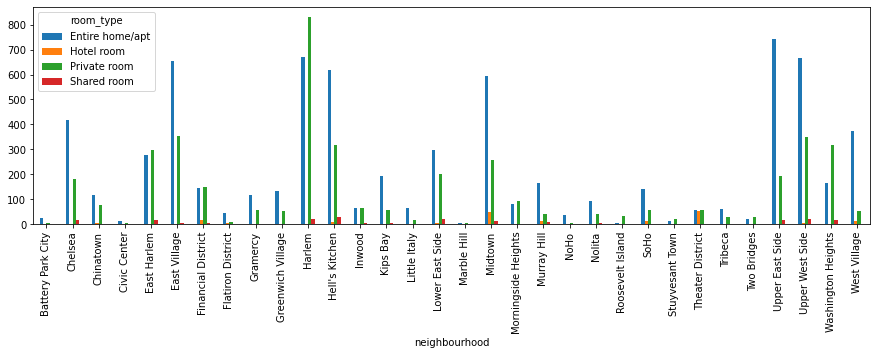

In [47]:
#From the above chart we can conclude that 

manhattan_filter = abnb2['neighbourhood_group'] == 'Manhattan'
manhattan = abnb2[manhattan_filter]

fig,ax = plt.subplots(1,figsize=(15,4))
pd.pivot_table(data=manhattan, index='neighbourhood', columns='room_type', values='id' ,aggfunc='count').plot(kind='bar',ax=ax)


# From above bar chart it is seen that Upper East Side has more Entire home/apts, while Roosevelt Island very few.
# and Private rooms are mostly available in Harlem neighborhood

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

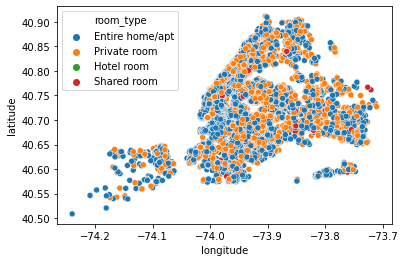

In [49]:
sns.scatterplot(data = abnb2, x = 'longitude',y = 'latitude',hue = 'room_type')

# The scatterplot shows how Room types are distributed across New York City

In [50]:
filter = abnb2['minimum_nights']>=30
abnb2[filter].groupby(by='host_name')['id'].count().sort_values(ascending=False).head(10)

host_name
Michael           159
David             123
Stay With Vibe    110
Jeniffer          101
Mike               99
John               96
Kaz                95
Alex               89
Daniel             89
Maria              74
Name: id, dtype: int64

# The above data frame lists the people who want to put their house on rent

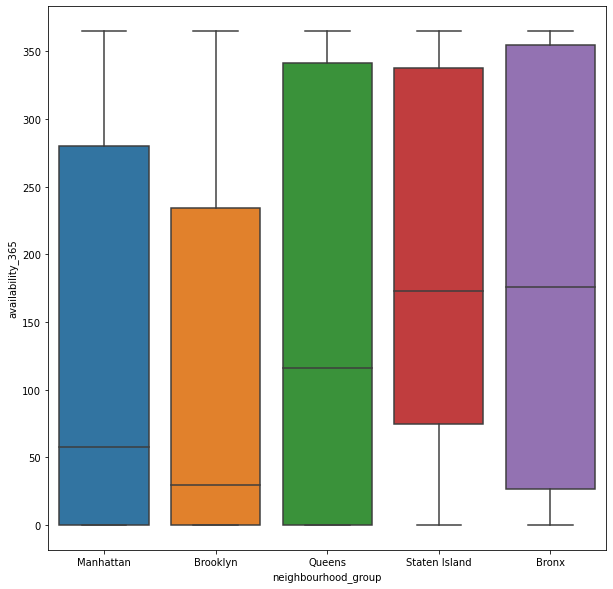

In [52]:
plt.figure(figsize=(10,10))
avai = sns.boxplot(data=abnb2, x='neighbourhood_group',y='availability_365')

# The chart shows that we have low availibilty for the listings in all the boroughs